In [1]:
import geopandas as gpd
import pandas as pd

In [3]:
input_reporting_units = gpd.read_file("in_data/input_reporting_units.shp")
input_reporting_units = input_reporting_units.rename(columns={'Agricultur':'ag_dens', 'Roads_Dens': 'rd_dens',
                                                  'Invasives_':'ivs_dens', 'Vegetation': 'av_veg_dep'})
input_reporting_units['indx'] = input_reporting_units.index
input_reporting_units.to_csv("in_data/input_reporting_units.csv")
input_reporting_units.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rd_dens     167 non-null    float64 
 1   ag_dens     167 non-null    float64 
 2   ivs_dens    167 non-null    float64 
 3   av_veg_dep  167 non-null    float64 
 4   Shape_Leng  167 non-null    float64 
 5   Shape_Area  167 non-null    float64 
 6   geometry    167 non-null    geometry
 7   indx        167 non-null    int64   
dtypes: float64(6), geometry(1), int64(1)
memory usage: 10.6 KB


<AxesSubplot:>

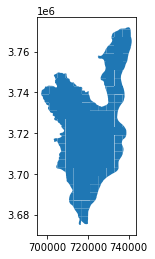

In [4]:
input_reporting_units.plot()

In [5]:
from mpilot.program import Program
import os

In [6]:
THIS_FOLDER = os.path.dirname(os.path.abspath("MPilot-Geospatial-Tutorial"))

in_path = os.path.join(THIS_FOLDER, 'input_reporting_units.csv')
out_path = os.path.join(THIS_FOLDER, 'output_reporting_units.csv')

OUTPUT_SHAPEFILE_PATH = os.path.join(THIS_FOLDER, 'out_data/output_reporting_units.shp')

In [7]:
p = Program()
EEMSRead = p.find_command_class('EEMSRead')
p.add_command(EEMSRead, 'rd_dens', {'InFileName': in_path, 'InFieldName': 'rd_dens'})
p.add_command(EEMSRead, 'ag_dens', {'InFileName': in_path, 'InFieldName': 'ag_dens'})
p.add_command(EEMSRead, 'indx', {'InFileName': in_path, 'InFieldName': 'indx'})

In [8]:
# CvtToFuzzy
CvtToFuzzy = p.find_command_class('CvtToFuzzy')
p.add_command(CvtToFuzzy, 'ag_dens_fz', {'InFieldName': 'ag_dens', 'TrueThreshold': 0, 'FalseThreshold': 50})
p.add_command(CvtToFuzzy, 'rd_dens_fz', {'InFieldName': 'rd_dens', 'TrueThreshold': 0, 'FalseThreshold': 3})

In [9]:
# FuzzyAnd
FuzzyAnd = p.find_command_class('FuzzyAnd')
p.add_command(FuzzyAnd, 'low_human_imp', {'InFieldNames': ['ag_dens_fz', 'rd_dens_fz']})

In [10]:
# EEMSWrite
EEMSWrite = p.find_command_class('EEMSWrite')
p.add_command(EEMSWrite, 'output', {'OutFileName': out_path, 'OutFieldNames': ['indx', 'low_human_imp', 'ag_dens_fz', 'rd_dens_fz']})

In [11]:
# Create the EEMS Command File
p.to_file('EEMS_model.mpt')

# Run the EEMS model
p.run()

In [13]:
output_reporting_units = pd.read_csv("output_reporting_units.csv")
output_reporting_units = pd.merge(output_reporting_units, input_reporting_units[["indx", "geometry"]], on='indx', how='inner')
output_reporting_units.info()
output_reporting_units = gpd.GeoDataFrame(output_reporting_units, geometry = output_reporting_units.geometry)
output_reporting_units.set_crs(epsg=4326)
output_reporting_units.to_file(filename = OUTPUT_SHAPEFILE_PATH)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   indx           167 non-null    float64 
 1   low_human_imp  167 non-null    float64 
 2   ag_dens_fz     167 non-null    float64 
 3   rd_dens_fz     167 non-null    float64 
 4   geometry       167 non-null    geometry
dtypes: float64(4), geometry(1)
memory usage: 7.8 KB


C:\Users\zrcan\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  
